# MAP433 - EN1

### *Groupe 43 : WANG XIAOZHEN & CHEN YUNHAO & LAHIANI MAZIGH*

In [11]:
import numpy as np
import scipy.special as scm
import matplotlib.pyplot as plt


## 1

D'abord, on crée un tableau pour noter les valeurs de la figure 1.

In [12]:
N = 1900 

DATA = np.array([[0, 1, 2, 3, 4, 5],
                 [692, 680, 335, 131, 51, 11] 
                ])

print(DATA)

[[  0   1   2   3   4   5]
 [692 680 335 131  51  11]]


| Nombre de buts marqués | Nombre d’observations |
|:-----------------------:| :----------------------: |
|0|692|
|1|680|
|2|335|
|3|131|
|4|51|
|5|11|
|Total|1900|

## 2

A partir du tableau, on sait que $N = 1900$. Par la méthode de la vraissemblance, on a la fonction

$$
\notag
L(\lambda) = \prod _{i=1} ^N {p_\lambda (x_i)} = \prod _{k=0} ^{+ \infty} {p_\lambda (k) ^ {N_k}}
$$

Ici, $N_k$ est la nombre des matches où $k$ buts ont été marqués.

Ensuite, on calcule la log-vraissemblance:
$$
\notag
l(\lambda) = log(L(\lambda)) =  \sum\limits_{k = 0}^{ + \infty } {{N_k}\ln {p_\lambda }\left( k \right)}  = \sum\limits_{k = 0}^{ + \infty } {{N_k}\left( { - \lambda  + k\ln \lambda  - \ln k!} \right)} 
$$

La première et deuxième dérivée de $l(\lambda)$

$$
\notag
l'(\lambda) = \sum\limits_{k = 0}^{+ \infty} {{N_k}\left( { - 1 + \frac{k}{\lambda }} \right)}
$$

$$
\notag
l''(\lambda) = -\sum\limits_{k = 0}^{+ \infty} {{N_k}\left( { \frac{k}{\lambda^2 }} \right)} < 0
$$

Donc, on a le point maximal $\hat \lambda $
$$
\notag
l'(\hat \lambda ) = \sum\limits_{k = 0}^{+ \infty} {{N_k}\left( { - 1 + \frac{k}{\hat \lambda  }} \right)} = 0
\\
\hat \lambda  = \frac{1}{N}\sum\limits_{k = 0}^{+ \infty} {k{N_k}}
$$

Quand $k \in \{0, 1, 2, 3, 4, 5\}$, on calcule
$$
\notag
\hat \lambda  = \frac{1}{N}\sum\limits_{k = 0}^{+ \infty} {k{N_k}} \approx 1.05368
$$

In [13]:
lambda_1 = np.sum(DATA[0] * DATA[1])/N
print(lambda_1)

1.0536842105263158


## 3

On sait que la variable aléatoire $X$ suit la loi de Poisson de paramètre $\lambda$.

$$
\notag
E_\lambda (X) = \lambda, 
{Var}_\lambda (X) = \lambda
$$

Donc le moment d'ordre 2 égale
$$
\notag
\mathbb{E}_\lambda (X^2) =E_\lambda (X)^2 + {Var}_\lambda (X) = \lambda^2 + \lambda
$$

Alors l'estimateur ${\tilde \lambda }$ de l'intensité $\lambda$ sur le moment d'ordre 2 satisfait:
$$
\notag
{{\tilde \lambda }^2} + \tilde \lambda  = \frac{1}{N}\sum\limits_{k = 0}^5 {{k^2}{N_k}} 
$$

Donc:
$$
\notag
\tilde \lambda  =  - \frac{1}{2} + \sqrt {\frac{1}{4} + \frac{1}{N}\sum\limits_{k = 0}^5 {{k^2}{N_k}} } \approx 1.08363
$$
(L'autre $ \tilde \lambda =  - \frac{1}{2} - \sqrt {\frac{1}{4} + \frac{1}{N}\sum\limits_{k = 0}^5 {{k^2}{N_k}} }$ est négative) 

In [14]:
lambda_2 = -1/2 + (1/4 + np.sum((DATA[0] **2 * DATA[1]))/N) ** (1/2)
print(lambda_2)

1.083633397236275


## 4

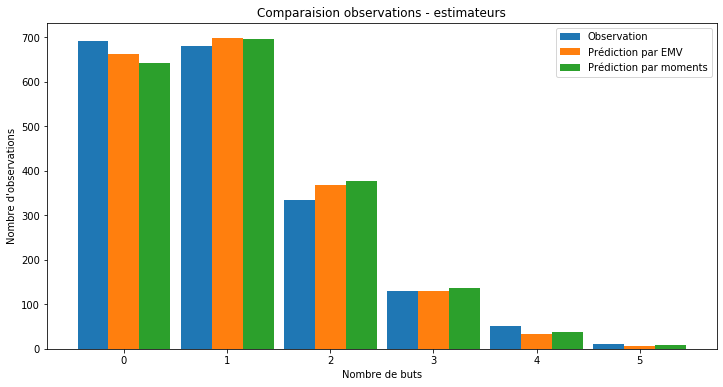

In [15]:
p_1 = lambda k : np.exp(-lambda_1)*(lambda_1**k)/(scm.factorial(k))
p_2 = lambda k : np.exp(-lambda_2)*(lambda_2**k)/(scm.factorial(k))
ks = DATA[0];
fig, ax = plt.subplots(figsize = (12, 6))
p_observation = DATA[1];
prediction_1 = p_1(ks)*N
prediction_2 = p_2(ks)*N
bar0 = ax.bar(ks-0.3, p_observation, \
        width = 0.3, alpha = 1, label='Observation')
bar1 = ax.bar(ks, prediction_1,  \
        width = 0.3, alpha = 1, label='Prédiction par EMV')
bar2 = ax.bar(ks+0.3, prediction_2,  \
        width = 0.3, alpha = 1, label='Prédiction par moments')

ax.set_xlabel("Nombre de buts")
ax.set_ylabel("Nombre d'observations")
ax.set_title("Comparaision observations - prédictions par les estimateurs")
ax.legend(loc = 'best');

## 5

Par le sujet, on a

In [17]:
n = 30;

Comme la question 2, on sait que la fonction de log-vraissemblance en $p$:

$$
\notag
l\left( p \right) 
= \sum\limits_{k = 0}^{ + \infty } {{N_k}\ln \left({{n}\choose{k}} p^k (1-p)^{n-1} \right)}  = \sum\limits_{k = 0}^{ + \infty } {{N_k} \left({\ln {{n}\choose{k}} + k\ln p + \left( {n - k} \right)\ln \left( {1 - p} \right)} \right)} 
\\
l'\left( p \right)  = \sum\limits_{k = 0}^{ + \infty } {{N_k}\left( {\frac{k}{p} - \frac{{n - k}}{{1 - p}}} \right)}
\\
l''\left( p \right)  = \sum\limits_{k = 0}^{ + \infty } {{N_k}\left( -{\frac{k}{p^2} - \frac{{n - k}}{(1 - p)^2}} \right)}<0
$$

On va chercher le point maximal $\hat p$ de log-vraissemblance 

$$
\notag
l'\left( p \right) = 0 \Leftrightarrow p = \frac{{\sum\limits_{k = 0}^{ + \infty } {k{N_k}} }}{{n\sum\limits_{k = 0}^{ + \infty } {{N_k}} }} = \frac{1}{{nN}}\sum\limits_{k = 0}^{ + \infty } {k{N_k}} 
$$

Donc l'estimateur de maximum de vraisseblance est:
$$
\notag
\hat p = \frac{1}{{nN}}\sum\limits_{k = 0}^5 {k{N_k}} \approx 0.0351
$$

In [18]:
p_estime = np.sum(DATA[0] * DATA[1])/N/n
print(p_estime)

0.03512280701754386


## 6

En utilisant la question 2 et 5, on remarque la relation suivante:
$$
\notag
\hat \lambda = n \hat p
$$

L’explication de cette relation:

On peut d'abord revenir aux définitions : $\hat \lambda$ est la moyenne de nombre de but marqué en un match (car egale au moment d'ordre un), ensuite $ \hat p$ est une estimation de la probabilité qu'une action se finisse en but, et vu que le nombre d'action est $n$ et qu'on a l'independence entre les actions, on a naturellement  $\hat \lambda = n \hat p$.

Plus précisement, on voit qu'ici les conditions $n \geq 30$ et $ p \leq 0,1$ sont bien respectées, on peut donc approximer la loi binomiale $B(n, p)$ par une loi de poisson de paramètre $\lambda = n * p$, et on retombe exactement sur l'estimateur  $\hat \lambda$